<a href="https://colab.research.google.com/github/pablomarin-utp/Machine_learning_projects/blob/master/cats_vs_dogs/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: importa el datset de vts vs dogs

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


--2025-04-15 17:45:41--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.31.207, 142.251.18.207, 142.250.153.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.31.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  29.7MB/s    in 2.2s    

2025-04-15 17:45:43 (29.7 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
from tensorflow.keras import layers
import tensorflow as tf
#batchNormalization
from tensorflow.keras.layers import BatchNormalization


model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),

    #dropout
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reescalado de píxeles
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Crear los generadores de imágenes desde los folders ya organizados
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Debe coincidir con input_shape de tu red
    batch_size=32,
    class_mode='binary'      # Porque tienes dos clases: perros y gatos
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)


Epoch 1/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - accuracy: 0.9467 - loss: 0.1358 - val_accuracy: 0.6885 - val_loss: 0.8597
Epoch 2/30
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9688 - loss: 0.1474

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9688 - loss: 0.1474 - val_accuracy: 0.7036 - val_loss: 0.7758
Epoch 3/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.9519 - loss: 0.1261 - val_accuracy: 0.7238 - val_loss: 0.7023
Epoch 4/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 1.0000 - loss: 0.0347 - val_accuracy: 0.7379 - val_loss: 0.6580
Epoch 5/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.9604 - loss: 0.1139 - val_accuracy: 0.7460 - val_loss: 0.6884
Epoch 6/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9688 - loss: 0.0578 - val_accuracy: 0.7520 - val_loss: 0.6480
Epoch 7/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.9621 - loss: 0.1015 - val_accuracy: 0.7440 - val_loss: 0.6997
Epoch 8/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 1.0000 - loss: 0.0239 - val_accuracy: 0.7520 - val_loss: 0.6956
Epoch 9/30
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.9638 - loss: 0.0966 - val_accuracy: 0.7419 - val_loss: 0.

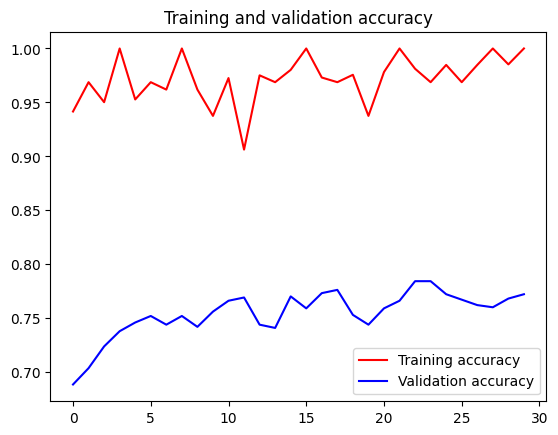

<Figure size 640x480 with 0 Axes>

In [ ]:
# prompt: evalua el modelo

import matplotlib.pyplot as plt

acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()


In [ ]:
# prompt: lets use transfer learning.

import tensorflow as tf
from tensorflow.keras.applications import InceptionV3

# Crea el modelo base InceptionV3 sin las capas de clasificación
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

# Congela las capas del modelo base
base_model.trainable = False

# Agrega capas de clasificación personalizadas
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Agrega Dropout para regularización
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compila el modelo
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrena el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=10,  # Reduce el número de épocas para una prueba rápida
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 288ms/step - accuracy: 0.8415 - loss: 1.6246 - val_accuracy: 0.9466 - val_loss: 0.1447
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.9375 - loss: 0.4389 - val_accuracy: 0.9567 - val_loss: 0.1096
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 158ms/step - accuracy: 0.9504 - loss: 0.1365 - val_accuracy: 0.9667 - val_loss: 0.1015
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8125 - loss: 0.8068 - val_accuracy: 0.9556 - val_loss: 0.1258
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - accuracy: 0.9597 - loss: 0.1398 - val_accuracy: 0.9496 - val_loss: 0.1454
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 1.0000 - loss: 0.0131 - val_accuracy: 0.9556 - val_loss: 0.1394
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 97ms/step - accuracy: 0.9667 - loss: 0.0899 - val_accuracy: 0.9637 - val_loss: 0.1076
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - 

In [ ]:
# prompt: crea un pipeline para pasarle lo que sea al modelo

import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(image_path, model):
  img = image.load_img(image_path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0  # Asegúrate de preprocesar la imagen igual que en el entrenamiento
  prediction = model.predict(x)
  return prediction[0][0]  # Devuelve la probabilidad de ser un gato (0) o un perro (1)

image_path = 'perro.jpg'
prediction = predict_image(image_path, model)
print(f"La probabilidad de que la imagen sea un perro es: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
La probabilidad de que la imagen sea un perro es: 0.9981923699378967


In [ ]:
# prompt: dowload de model as "cats_vs_dogs"

from google.colab import files
model.save('cats_vs_dogs.h5')
files.download('cats_vs_dogs.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>